## Monte Carlo algorithm to simulate the Ising model

- $H$ is the magnetic field and $\mu$ is the magnetic moment associated with each spin

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndi

In [112]:
def calculate_energe(lattice):
    # 边界当作0,每条边算了两次
    kern = ndi.generate_binary_structure(2,1)
    kern[1][1] = False
    arr = -lattice * ndi.convolve(lattice, kern, mode='constant')
    return arr.sum()

In [138]:
def calculate_energy(lattice, i, j):
    # Calculate energy contribution from nearest neighbors
    neighbors_sum = (
        lattice[(i + 1) % L, j] + lattice[(i - 1) % L, j] +
        lattice[i, (j + 1) % L] + lattice[i, (j - 1) % L]
    )
    return -lattice[i, j] * neighbors_sum

def monte_carlo_step(lattice, temperature):
    i = np.random.randint(0, L)
    j = np.random.randint(0, L)

    current_energy = calculate_energy(lattice, i, j)
    # Try flipping the spin
    lattice[i, j] *= -1
    
    new_energy = calculate_energy(lattice, i, j)
    energy_diff = new_energy - current_energy
    
    if energy_diff > 0 and np.random.rand() > np.exp(-energy_diff /(kbeta*temperature)):
        # Revert the spin flip
        lattice[i, j] *= -1

def simulate_ising_model(L, num_sweeps, temperature):
    lattice = np.random.choice([-1, 1], size=(L, L))
    energies = []
    magnetizations = []

    for _ in range(num_sweeps):
        for _ in range(L * L):
            monte_carlo_step(lattice, temperature)
        
        total_energy = -np.sum([
            calculate_energy(lattice, i, j) for i in range(L) for j in range(L)
        ]) / 2.0  # Each interaction counted twice
        print(total_energy)
        print(calculate_energe(lattice))
        total_magnetization = np.sum(lattice)
        
        energies.append(total_energy)
        magnetizations.append(total_magnetization)

    return lattice, energies, magnetizations


def plot_state(lattice):
    import matplotlib as mpl
    cmap = (mpl.colors.ListedColormap(['#F0E825', 'blue']))
    fig,ax = plt.subplots()
    ax.imshow(lattice,cmap=cmap  )#interpolation='bicubic'
    ax.set_xticks([])
    ax.set_yticks([])
    return fig, ax

In [139]:
lattice

array([[ 1,  1],
       [-1,  1]])

In [142]:
L = 2
total_energy = -np.sum([
            calculate_energy(lattice, i, j) for i in range(L) for j in range(L)
    ]) / 2.0

total_energy

0.0

In [143]:
calculate_energe(lattice)

0

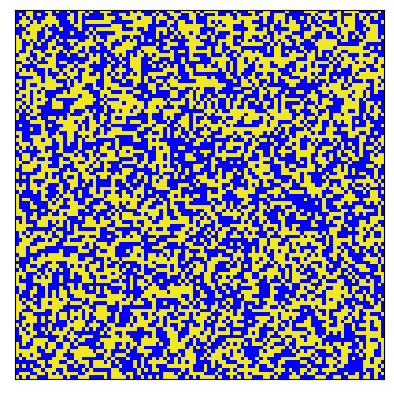

In [110]:
L= 100
lattice = np.random.choice([-1, 1], size=(L, L))
fig, ax = plot_state(lattice)

52.0
-92
64.0
-116
72.0
-132
88.0
-160
108.0
-192
124.0
-236
124.0
-216
128.0
-224
116.0
-216
124.0
-232
104.0
-200
120.0
-224
108.0
-204
100.0
-184
140.0
-260
100.0
-180
116.0
-220
128.0
-232
120.0
-212
128.0
-216
116.0
-204
152.0
-280
160.0
-288
176.0
-316
168.0
-296
168.0
-308
184.0
-328
184.0
-328
184.0
-328
176.0
-316
192.0
-348
176.0
-312
184.0
-328
180.0
-320
172.0
-304
160.0
-280
144.0
-248
160.0
-284
160.0
-288
120.0
-220
112.0
-200
108.0
-200
108.0
-200
124.0
-232
136.0
-244
116.0
-216
144.0
-256
116.0
-212
152.0
-276
136.0
-236
152.0
-280
184.0
-328
176.0
-316
192.0
-344
168.0
-300
160.0
-288
168.0
-304
168.0
-296
176.0
-324
172.0
-308
156.0
-276
184.0
-332
172.0
-312
148.0
-264
156.0
-276
172.0
-304
156.0
-280
156.0
-272
136.0
-232
152.0
-264
144.0
-248
168.0
-304
172.0
-304
156.0
-276
136.0
-240
124.0
-220
152.0
-272
168.0
-296
176.0
-312
140.0
-252
136.0
-248
160.0
-292
164.0
-296
160.0
-284
152.0
-272
148.0
-260
140.0
-248
136.0
-244
128.0
-224
124.0
-220
112.0
-204
120.

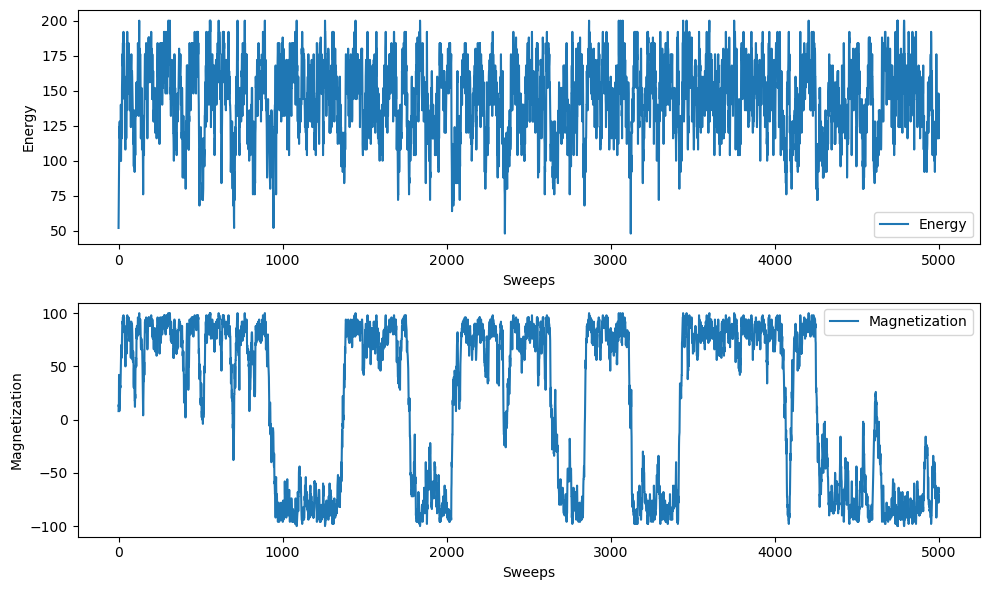

In [113]:
# Parameters
L = 10  # Size of the lattice
num_sweeps = 5000  # Number of sweeps
T = 2.3 # Temperature
kbeta = 1.0  # Boltzmann constant

lattice, energies, magnetizations = simulate_ising_model(L, num_sweeps, T)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(energies, label='Energy')
plt.xlabel('Sweeps')
plt.ylabel('Energy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(magnetizations, label='Magnetization')
plt.xlabel('Sweeps')
plt.ylabel('Magnetization')
plt.legend()

plt.tight_layout()
plt.show()